In [1]:
# Root directory of the project
import os
import sys
ROOT_DIR = os.path.abspath('/notebooks/BMW/FPN_RCNN/FPN_FRCNN_master/')
sys.path.append(ROOT_DIR)  # To find local version of the library

import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from frcnn.preprocess_helpers import *
from scipy.misc import imsave



# Visualize the Data

## Grabbing img and label PATHS

In [22]:
test = '6'

In [23]:
data_path = '/notebooks/BMW/data/images_'+test+'/'
original_data_path = '/notebooks/BMW/data/images_'+test+'/data_dir_localization_'+str(test)+'/'
augmented_data_path = '/notebooks/BMW/data/images_'+test+'/data_dir_localization_'+str(test)+'_augmented/'

In [24]:
imgs, labels = grab_paths(original_data_path)

In [25]:
len(imgs)

601

## Visualize the Data

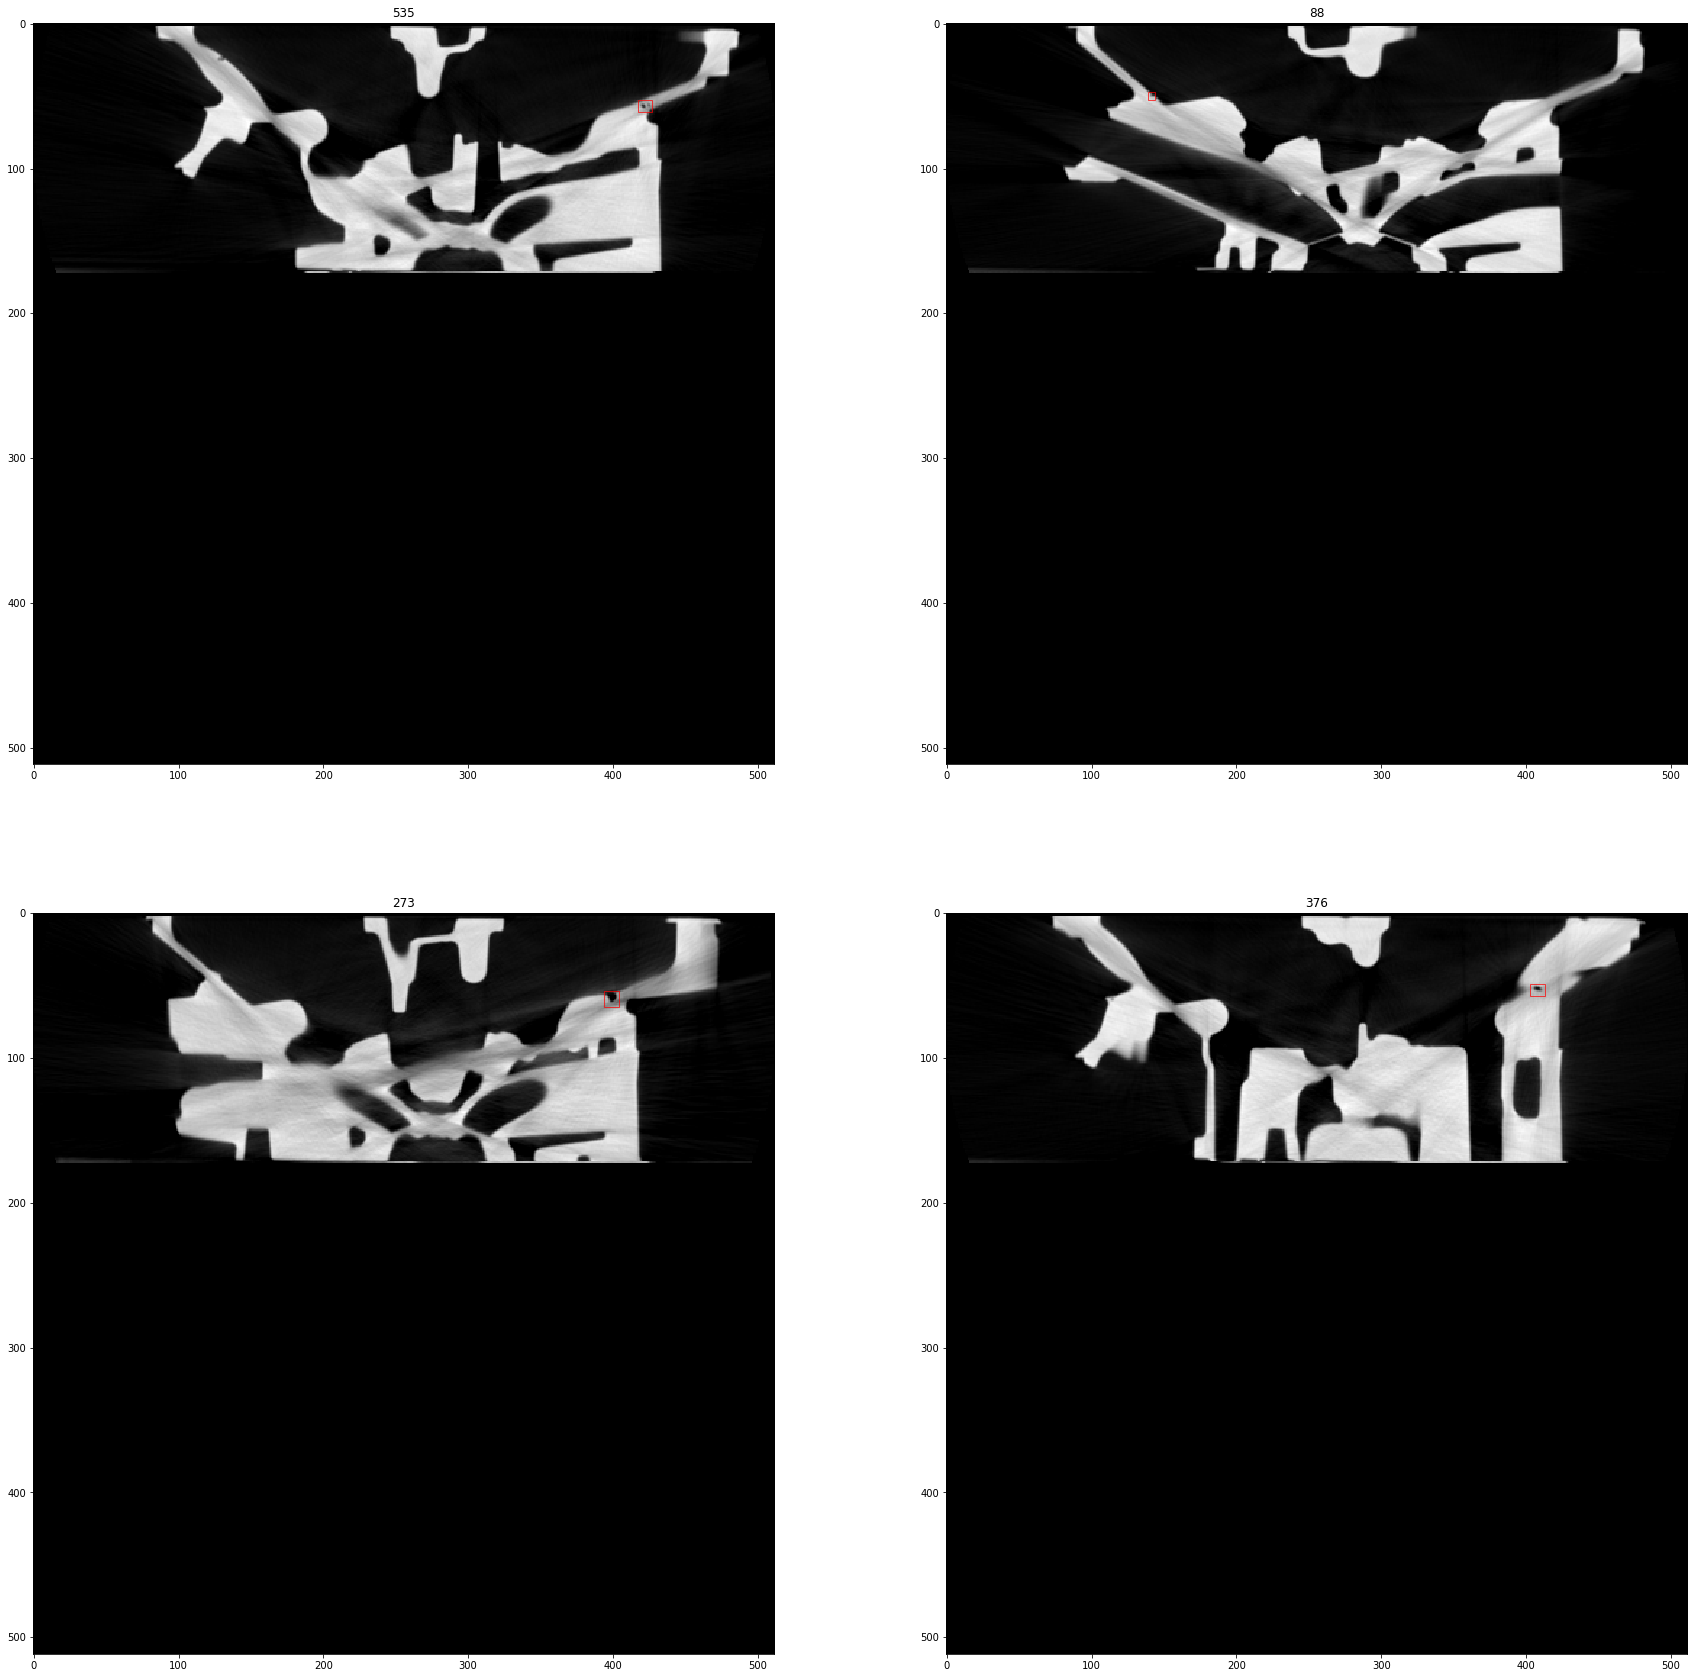

In [26]:
plot4(imgs,labels)

## Train Test Split 

**Set train test split percentage here:**

In [27]:
split = 0.80

In [28]:
total_imgs = len(imgs)
train_size = int(total_imgs*split)
val_size = total_imgs - train_size

# randomly select train indices 
train_idx = np.random.choice(a=np.arange(total_imgs),size=train_size, replace=False)
val_idx = np.delete(np.arange(total_imgs),train_idx, axis=0)

# subset train images 
train_imgs = [imgs[i] for i in train_idx]
train_labels = [labels[i] for i in train_idx]
train_imgs.sort()
train_labels.sort()

# subset validation images 
val_imgs = [imgs[i] for i in val_idx]
val_labels = [labels[i] for i in val_idx]
val_imgs.sort()
val_labels.sort()

print('Number of train images: {}'.format(train_size))
print('Number of val images: {}'.format(val_size))

Number of train images: 480
Number of val images: 121


## Image Augmentation

### 90, 180, 270 Degree Rotation 

In [29]:
rotated_imgs, rotated_labels = rotate(train_imgs,train_labels,[90,180,270], augmented_data_path)

## Check Rotations

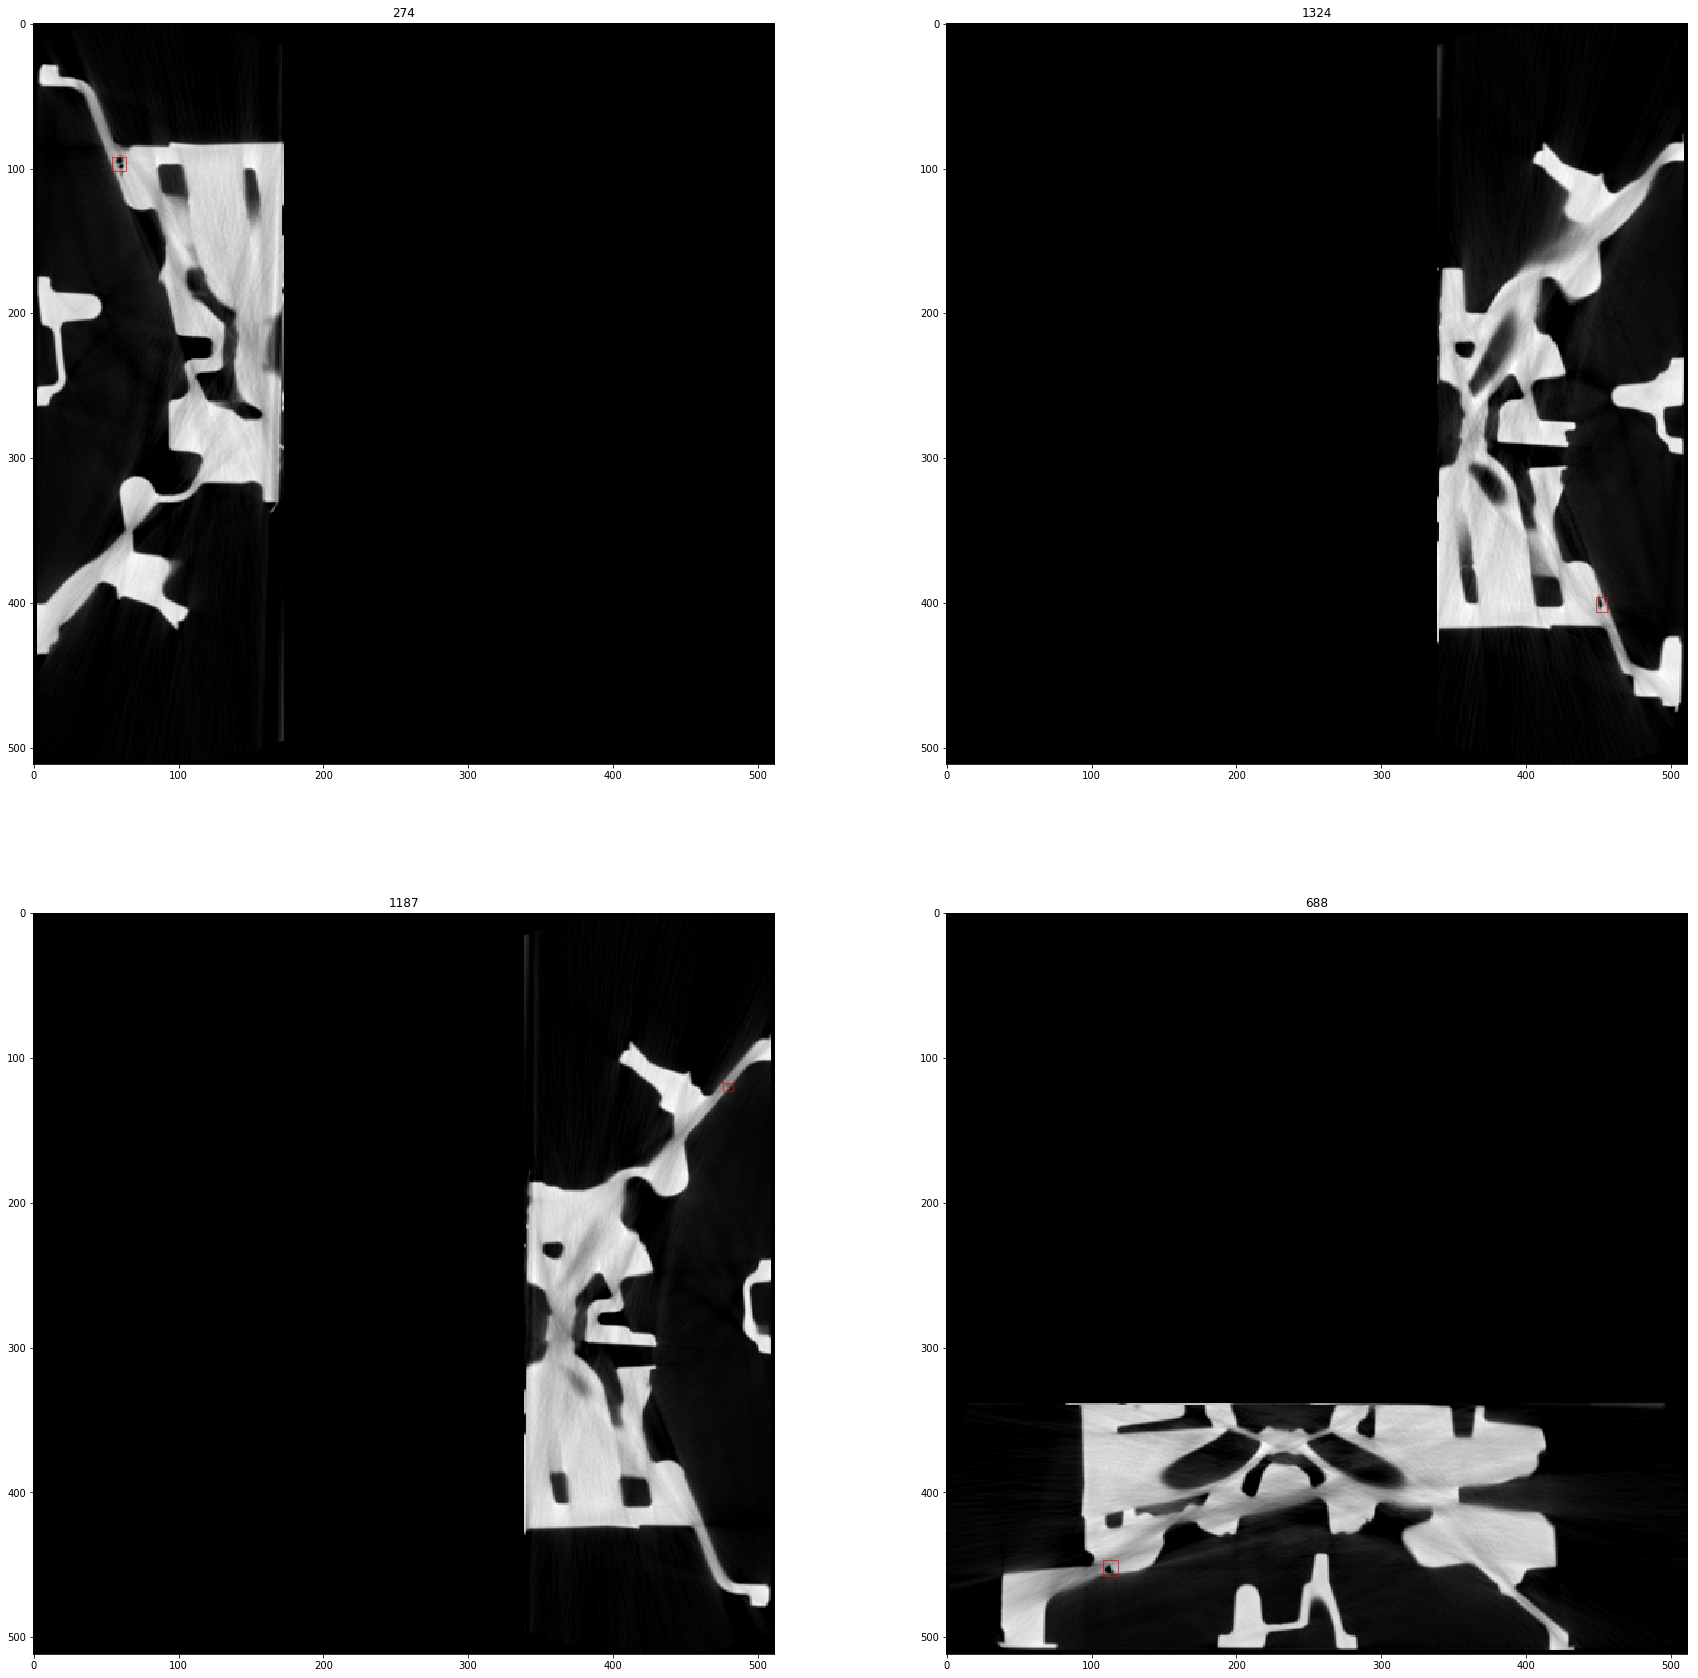

In [30]:
plot4(rotated_imgs,rotated_labels)

_______________

### Vertical Flip 

In [31]:
flipped_imgs, flipped_labels = vflip(train_imgs,train_labels, augmented_data_path)

## Check Flips 

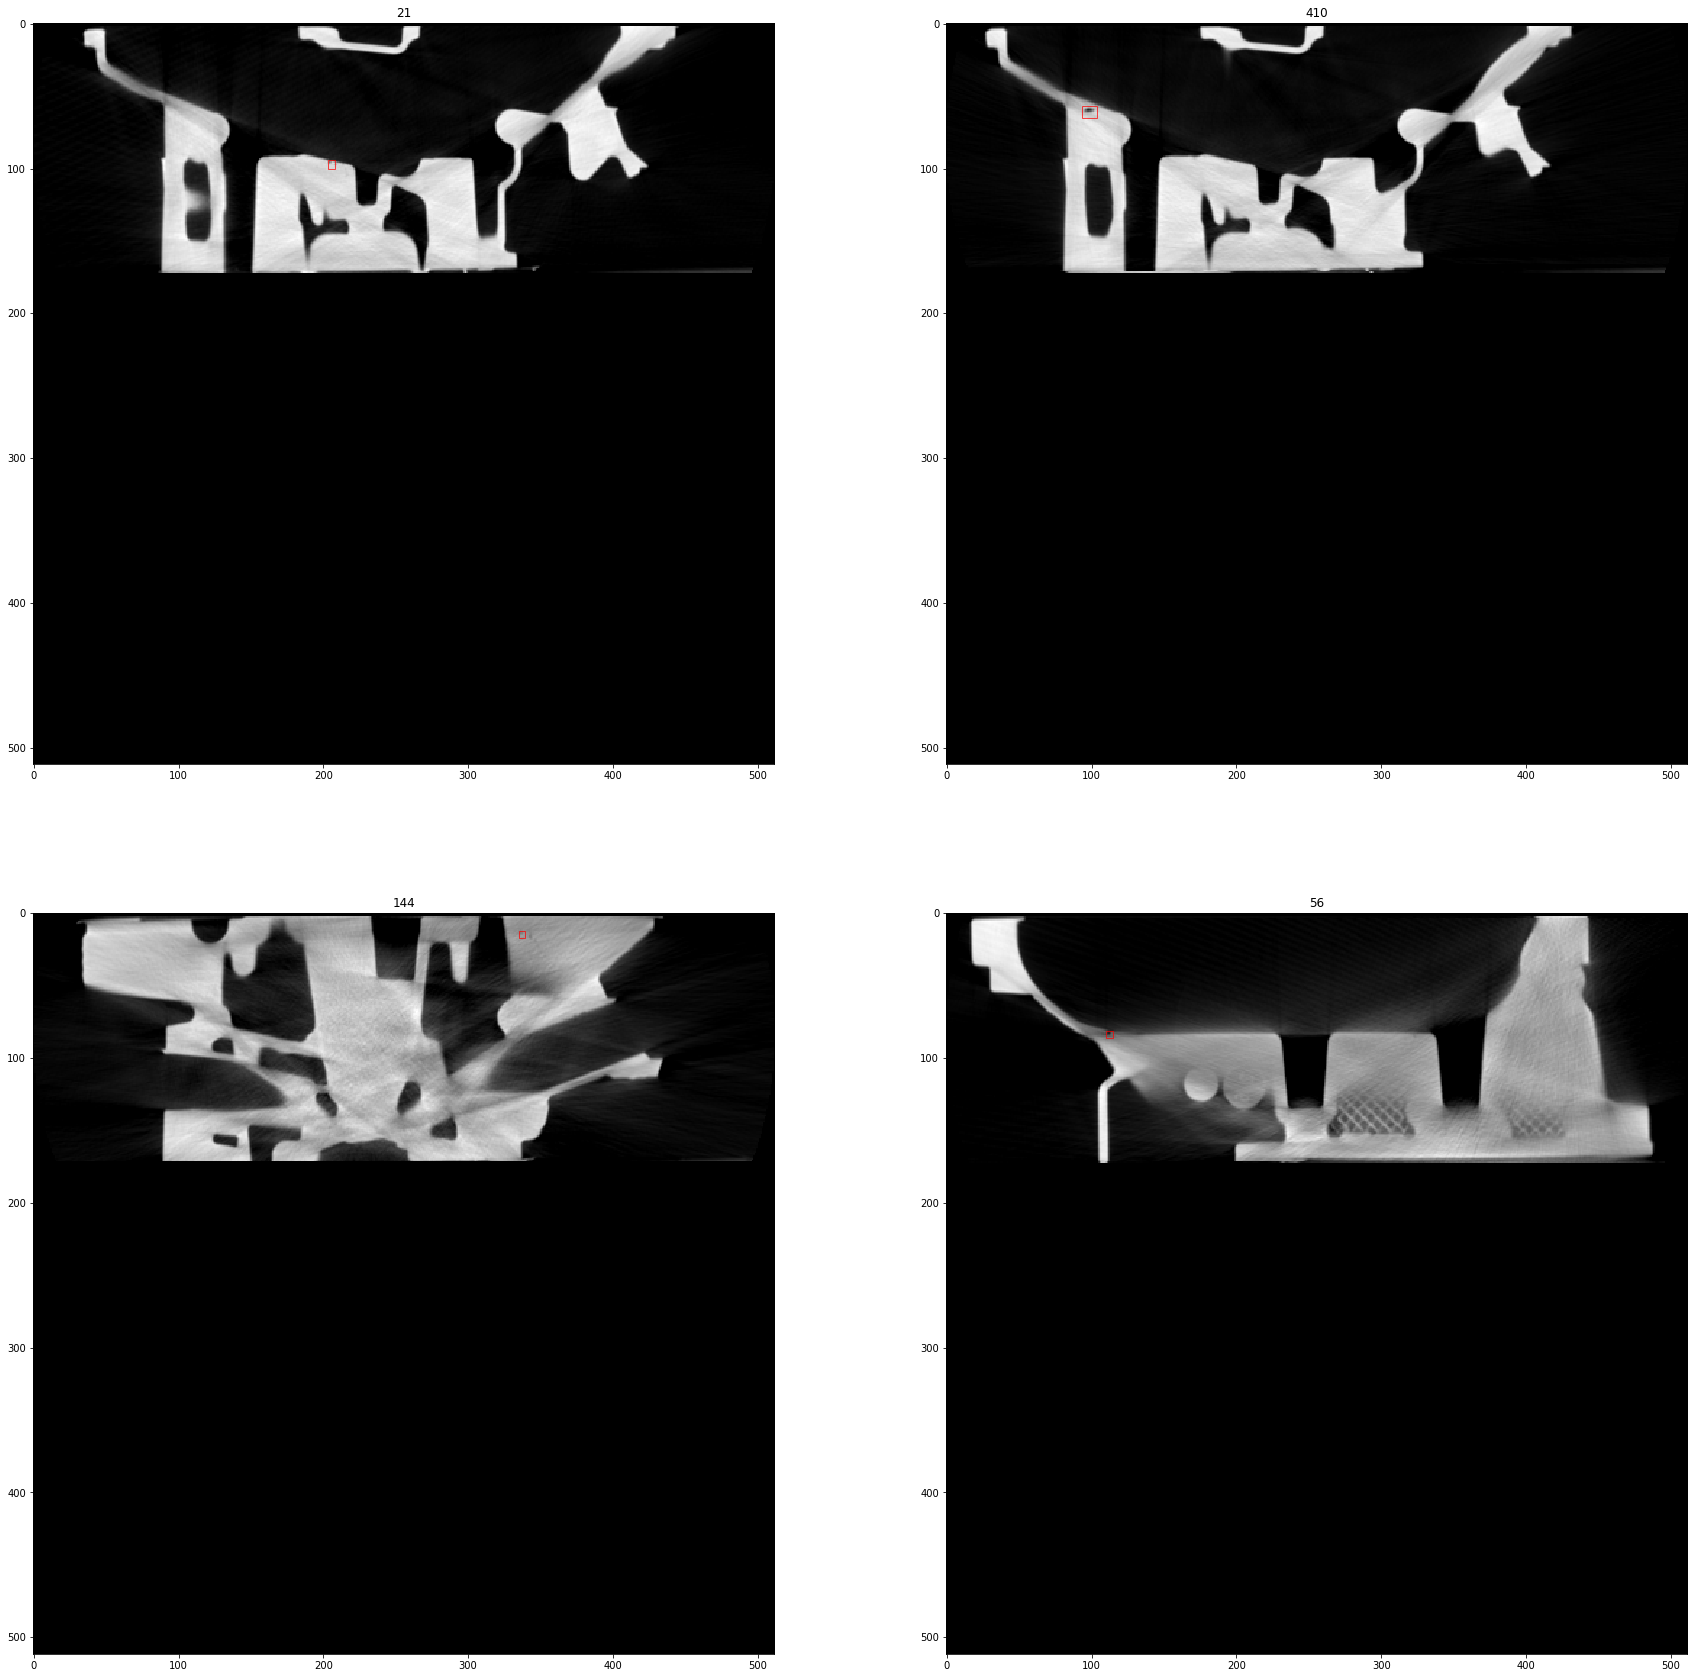

In [32]:
plot4(flipped_imgs,flipped_labels)

## Rotate vertical flips 

In [33]:
rotated_vertical_imgs, rotated_vertical_labels = rotate(flipped_imgs,flipped_labels,[90,180,270], augmented_data_path)

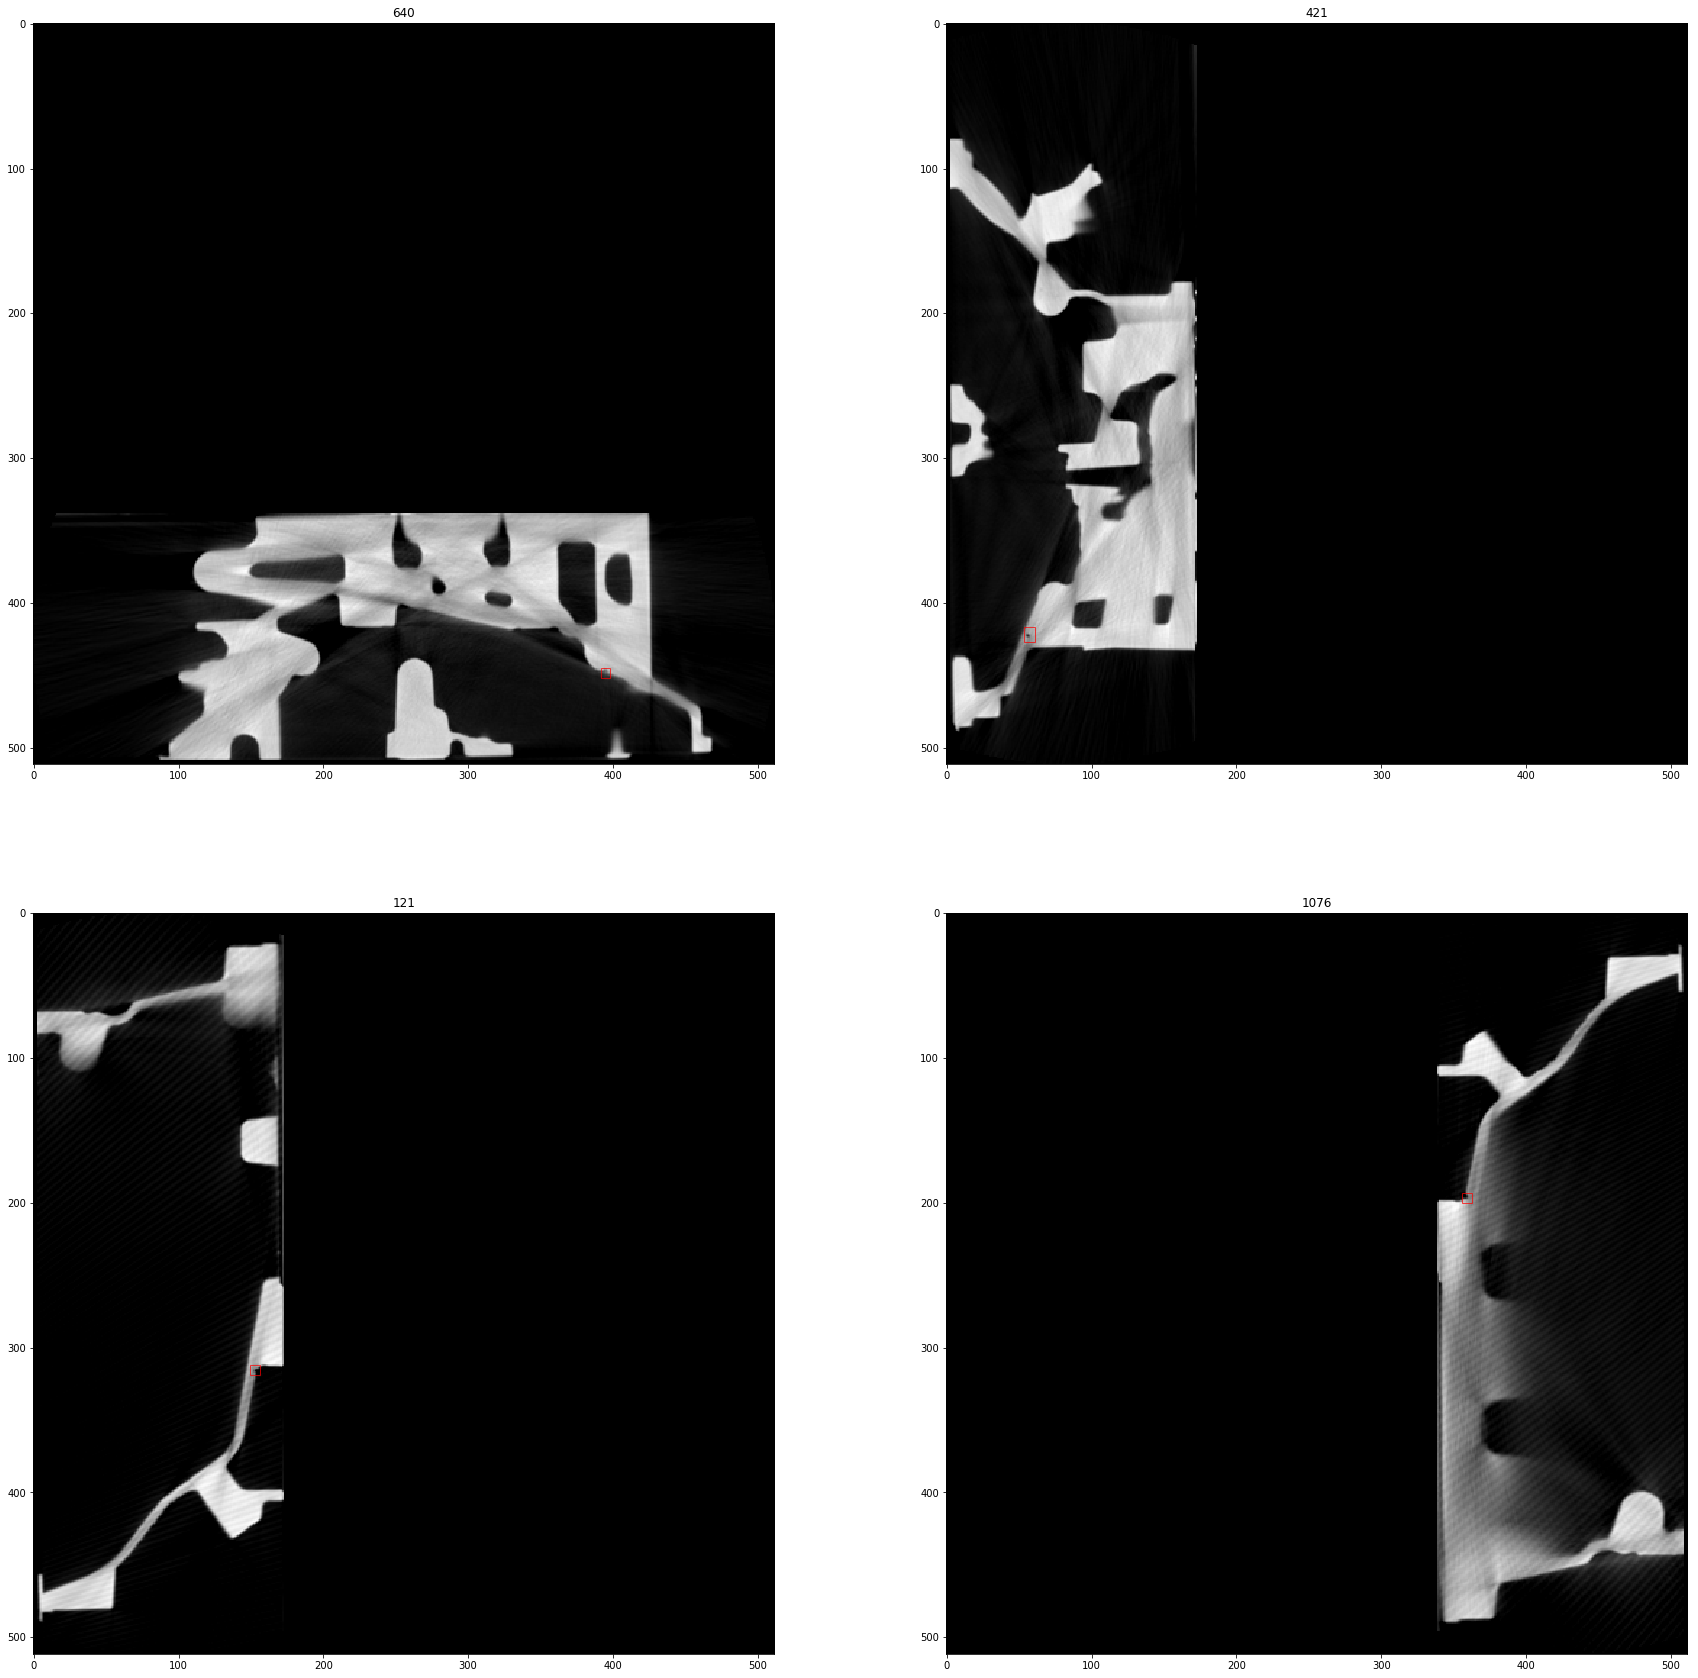

In [34]:
plot4(rotated_vertical_imgs, rotated_vertical_labels)

## Collect all train imgs

In [35]:
train_imgs = train_imgs + rotated_imgs + rotated_vertical_imgs 
train_labels = train_labels + rotated_labels + rotated_vertical_labels 

print('Final number of train images: {}'.format(len(train_imgs)))
print('Final number of val images: {}'.format(len(val_imgs)))

Final number of train images: 3360
Final number of val images: 121


## Save Train / Val Annotation Files 

In [36]:
file = [] 
x1 = []
y1 = [] 
x2 = [] 
y2 = [] 
label = [] 
area = []
length = []
datasets = []

cols = ['file','x1','y1','x2','y2','label']
for data in ['train','val']:
    file = [] 
    x1 = []
    y1 = [] 
    x2 = [] 
    y2 = [] 
    label = [] 
    if data == 'train':
        idx = len(train_imgs)
        labels = train_labels
        imgs = train_imgs
    if data =='val':
        idx = len(val_imgs)
        labels = val_labels
        imgs = val_imgs 
    for img in range(idx):
        bboxes = np.load(labels[img])
        for bbox in range(bboxes.shape[0]):
            coords = bboxes[bbox]
            file.append(imgs[img])
            x1.append(coords[0])
            y1.append(coords[1])
            z1.append(coords[2])
            x2.append(coords[3])
            y2.append(coords[4])
            z2.append(coords[5])
            
            label.append('defect')

    dataset = pd.DataFrame({'file':file,'x1':x1,'y1':y1,'x2':x2,'y2':y2,'label':label})
    dataset = dataset[cols]
    dataset.to_csv(os.path.join(data_path,'annotation_'+test+'_{}'.format(data)+'.txt'), sep=',', index=False, header=False)
    datasets.append(dataset)

## Check Distribution of avg lengths 

In [73]:
train_dataset = datasets[1]

In [74]:
avg_length = (train_dataset.x2 - train_dataset.x1)*(train_dataset.y2 - train_dataset.y1)**(1/2)

In [75]:
avg_length.describe()

count    642.000000
mean      20.237445
std        6.994672
min        8.000000
25%       14.696938
50%       19.595918
75%       25.298221
max       34.785054
dtype: float64